# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [7]:
import os
import requests 
import tweepy
import pandas as pd 
from dotenv import load_dotenv
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Create a twitter developer account https://developer.twitter.com/  = OK
#Step 2: Initial setup  Create an app.py file inside the ./src/ folder. Install tweepy using PIP. =OK
#Step 3: Environment variables OK
# Se incluyen los datos de configuracion en el archivo 
#.env

# load the .env file variables
load_dotenv()

consumer_key  = os.getenv('CONSUMER_KEY')
consumer_secret = os.getenv('CONSUMER_SECRET')
bearer_token= os.getenv('bearer_token')

#Step 4: Innitialize the tweepy library Import Tweepy and requests library and tweepy.Client().
# Creando cliente de Twitter

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)



In [106]:
#Step 5: Start making requests to the API 100 tweets  Definiendo el query para Tweeter = ok 
#Make a query: Search tweets that have the hashtag #100daysofcode and the word python or pandas, from the last 7 days (search_recent_tweets).
#Do not include retweets. Limit the result to a maximum of 100 Tweets.
#Also include some additional information with tweet_fields (author id, when the tweet was created, the language of the tweet text).

query = '#100daysofcode (pandas OR python) -is:retweet'      

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [107]:
### Step 6: Convert to pandas Dataframe

#1. import pandas =OK
#2. Save data as dictionary =ok
#3. Extract "data" value from dictionary =ok
#4. Transform to pandas Dataframe =ok
#5. Take a look at the dataframe to make sure is correct `df.head()` =ok
#6. Save the data as a CSV file named coding-tweets.csv =ok

In [108]:
tweets

<Response [200]>

In [109]:
# Save data as dictionary
tweets_dict = tweets.json() 

In [110]:
list(tweets_dict)

['data', 'meta']

In [111]:
# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 
# Transform to pandas Dataframe
df = pd.json_normalize(tweets_data)
df

#https://www.kirenz.com/post/2021-12-10-twitter-api-v2-tweepy-and-pandas-in-python/twitter-api-v2-tweepy-and-pandas-in-python/

,lang,author_id,created_at,text,id
0,en,1185078770488598528,2022-07-06T13:52:33.000Z,The Web Developer Bootcamp 2022 Courses &gt; \...,1544680703723720705
1,en,845380769828802561,2022-07-06T13:51:27.000Z,We deliver unique work 💰 \n 🐿 DM for value-b...,1544680430066073600
2,en,930829216408420352,2022-07-06T13:50:51.000Z,I'm legit to offer you A grade in your\n✓nurs...,1544680276382650369
3,en,845380769828802561,2022-07-06T13:50:27.000Z,Looking for a tutor to take your final exams?\...,1544680175908028416
4,en,1535217575298093056,2022-07-06T13:50:21.000Z,Day 6 : Python\nLearnt : Functions and while l...,1544680152424099841
...,...,...,...,...,...
93,en,1372120672432844801,2022-07-06T12:54:39.000Z,"Coupons Free Discount - React, NodeJS, Express...",1544666133001019392
94,en,1372120672432844801,2022-07-06T12:53:47.000Z,Coupons Free Discount - React - Mastering Test...,1544665914821742593
95,en,813080485081600001,2022-07-06T12:53:20.000Z,#100DaysOfCode \n\nDay 4\n\nLanguage - Python\...,1544665804591202304
96,qme,4518345435,2022-07-06T12:52:35.000Z,https://t.co/X4TwNQOX3W\n\n#100DaysOfCode #alg...,1544665615339855873


In [112]:
tweets_data

[{'lang': 'en',
  'author_id': '1185078770488598528',
  'created_at': '2022-07-06T13:52:33.000Z',
  'text': 'The Web Developer Bootcamp 2022 Courses &gt; \nhttps://t.co/WTUUIog1br\n\n#udemy #coupons #webdevelopment #javascript30 #bootstrap4 #css3 #React #Nodejs #Angular #PHP #HTML5 #WordPress #vuejs #Redux #Django #Python #100DaysOfCode',
  'id': '1544680703723720705'},
 {'lang': 'en',
  'author_id': '845380769828802561',
  'created_at': '2022-07-06T13:51:27.000Z',
  'text': 'We deliver unique work 💰   \n 🐿 DM for value-based services  \n #Math \n #python \n #Math \n #Case study\n #Philosophy  \n #100DaysOfCode\n #Case study \n #Paper pay\n #homework \n #100DaysOfCode \n #essaywrite \n #Philosophy  \n @martinmut5 https://t.co/vSulXotC0b',
  'id': '1544680430066073600'},
 {'lang': 'en',
  'author_id': '930829216408420352',
  'created_at': '2022-07-06T13:50:51.000Z',
  'text': "I'm  legit to offer you A grade in your\n✓nursing\n✓essays\n✓chemistry\n✓finance\n✓physics\n✓biology.\n✓physics

In [113]:
list(tweets_data[0])

['lang', 'author_id', 'created_at', 'text', 'id']

In [114]:
# Example importing the CSV here
df.describe()

,lang,author_id,created_at,text,id
count,98,98,98,98,98
unique,7,51,96,98,98
top,en,845380769828802561,2022-07-06T13:31:14.000Z,The Web Developer Bootcamp 2022 Courses &gt; \...,1544680703723720705
freq,89,8,2,1,1


In [115]:
df.head()

,lang,author_id,created_at,text,id
0,en,1185078770488598528,2022-07-06T13:52:33.000Z,The Web Developer Bootcamp 2022 Courses &gt; \...,1544680703723720705
1,en,845380769828802561,2022-07-06T13:51:27.000Z,We deliver unique work 💰 \n 🐿 DM for value-b...,1544680430066073600
2,en,930829216408420352,2022-07-06T13:50:51.000Z,I'm legit to offer you A grade in your\n✓nurs...,1544680276382650369
3,en,845380769828802561,2022-07-06T13:50:27.000Z,Looking for a tutor to take your final exams?\...,1544680175908028416
4,en,1535217575298093056,2022-07-06T13:50:21.000Z,Day 6 : Python\nLearnt : Functions and while l...,1544680152424099841


In [116]:
#https://twittercommunity.com/t/saving-tweet-to-csv/153357/4
# save df
df.to_csv('coding-tweets.csv') #save the csv file into our computer

In [117]:
### Step 7: Search for the words

#Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'pandas', and 'python'. Define the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet). 

#> Make sure to convert any word or tweet text into lowercase.
#> You can use the re python library (regular expression operations). See the documentation for guidance: https://docs.python.org/3/library/re.html#


#1. import de `re` library using `import re` =ok
#2. Define your `word_in_text` function and implement the code. = ok

df= pd.read_csv('coding-tweets.csv')
#print(df_tweets.to_string()) 
lowercaseString = df.to_string().lower()
keys = "pandas|python"
p = re.compile(u'\\b(?iu)(?P<name>(%s))\\b' % keys)
print(p) 


re.compile('\\b(?iu)(?P<name>(pandas|python))\\b', re.IGNORECASE)


In [118]:
### Step 11:

#Iterate through dataframe rows counting the number of tweets in which pandas and python are mentioned, using your word_in_text() function.

#1. Initialize list to store tweet counts = ok 
#2. Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned. =ok

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())
 
 #iterate over the rows of the DataFrame and calculate how many tweets contain
 #each of our keywords! The list of objects for each candidate has been
 #initialized to 0

# 1. Initialize list to store tweet counts = ok 
[pandas, python] = [0, 0]

# 2. Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned. =ok
# each pandas and python is mentioned
for index, row in df.iterrows():
   pandas += word_in_text('pandas', row['text'])
   python += word_in_text('python', row['text'])
   


                                                text lang
0  The Web Developer Bootcamp 2022 Courses &gt; \...   en
1  We deliver unique work 💰   \n 🐿 DM for value-b...   en
2  I'm  legit to offer you A grade in your\n✓nurs...   en
3  Looking for a tutor to take your final exams?\...   en
4  Day 6 : Python\nLearnt : Functions and while l...   en


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


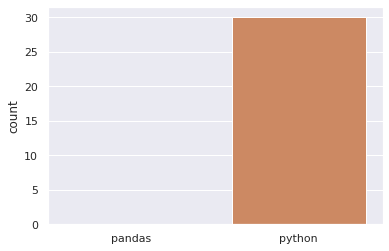

In [122]:
### Step 12: Visualize the data

#1. Import packages
#2. Set seaborn style
#3. Create a list of labels:cd
#4. Plot the bar chart
# first import seaborn as sns; you'll then construct a barplot of the
# data using sns.barplot, passing it two arguments: (i) a list of labels and
# (ii) a list containing e variables you wish to plot(clinton, trump and so on)

# Import packages

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot histogram
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.show()





As you can see Pandas is not mention in the dataset tweets but Python is mention in 30 times in tweets.